### Imports

In [5]:
from preprocessing_functions import *
from word_embedding_functions import *

import pandas as pd
import numpy as np
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

### Categorize_text algorithm

In [147]:
def categorize_text(lemmatized_wordlist, mean_vectors_dict, keywords, embeddings_dict, number_of_keywords=1, bottom_threshold=0.1, verbose1=False, verbose2=False):
    """
    --> Function that loads glove word embeddings.

        Parameters:
        -----------
            lemmatized_words: List -> List of words.
            keywords: nested list -> List of lists of keywords that represent categories.
            number_of_keywords: Int (default = 1) -> number of keywords to use from a category (setting it to 0 will use them all!)
            bottom_threshold: Float (default = 0.1) -> Lowest allowed similarity value between a word and dominant category.
            verbose1: Bool (default = False) -> Shows similarity calculations between a word and each keyword.
            verbose2: Bool (default = False) -> Shows similarity calculations between a word and each category.

    """
    keywords_to_use = number_of_keywords if number_of_keywords else 1000
    similar_categories = []
    
    for word in lemmatized_wordlist:
        try:
            word_vector = embeddings_dict[word]
        except:
            continue
            
        if verbose1 or verbose2:
            print(f"word: \t\t'{word}'")

        closeness = []

        for category in keywords:
            summed_similarity = 0
            for keyword in category[:keywords_to_use]:
                try:
                    keyword_vector = mean_vectors_dict[keyword]
                    # print(keyword)
#                 if isinstance(keyword, np.ndarray):
#                     keyword = 'Diplomacy'
                    # keyword_vector = mean_embedding
                except:
                    keyword_vector = embeddings_dict[keyword]
                
                value = 1 - cosine(keyword_vector, word_vector)
                summed_similarity += value
            
            normalized_similarity = summed_similarity/len(category[:keywords_to_use])
            # print(type(normalized_similarity), normalized_similarity)
            closeness.append((normalized_similarity, category[0]))

            if verbose1:
                # print('___________________________')
                print('===>', '\t\tcategory:', category[0], '\n\t\tsimilarity:', normalized_similarity, f"\n\t\tkeywords: {category[:keywords_to_use]}\n")


        similar_category = max(closeness)

        sortedcat = sorted(closeness, key=lambda item: item[0], reverse=True)
        if (sortedcat[0][0] - 0.05) > sortedcat[2][0]:
            allowed = True
        else:
            allowed = False



        if similar_category[0] > bottom_threshold and allowed:
            similar_categories.append((word, similar_category))
            if verbose2:
                #print('category similarity:')
                # pprint(sorted(closeness, key=lambda x: x[0], reverse=True))
                print(f"choice: \tkept")
                print(f"\n==> \tcategory:, {similar_category[1]}, \n\tsimilarity score: {similar_category[0]}")
        elif verbose2:
            print(f"choice: \tdiscarded")
            reason = 'ambiguity' if not allowed else 'low similarity score'
            print(f"reasoning: \t{reason}")

        if verbose2:
            # print(f"analysis: {'not' if not allowed else ''} enough difference\nscores:")
            print("\nscores:\n\t----category----          ----score----")
            for i in sortedcat:
                print(f"\t{i[1]:<10s} \t\t{i[0]}")
            print()

            print('='*100)
            print('')
    
    categories_dict = {key[0]: 0 for key in descriptive_keywords}
    
    for x in similar_categories:
        categories_dict[x[1][1]] += x[1][0] #print(x[1])
    

    nonsorted_results = list(sorted(categories_dict.items(), key=lambda item: item[0], reverse=False))
    results = list(sorted(categories_dict.items(), key=lambda item: item[1], reverse=True))
    #pprint(results)

    # print(f"\nThe dominant category is: '{results[0][0]}'", end='')
    #if (results[0][1] - (float(results[0][1])/5)) <= results[1][1]:  
    #    print(f", closely followed by: '{results[1][0]}'.")
    if verbose2:
        print('\n')
        pprint(similar_categories)
    # print('\n --------------------------------------------------------------------')
    
    prediction_dict = {'category_similarities': nonsorted_results, 'prediction': results[0][0]} 

    return prediction_dict

In [148]:
### Old Keywords

# conflict = ['war', 'fight', 'death', 'hostility', 'bomb', 'battle', 'nazi', 'army']
# politics = ['politics', 'debate', 'election', 'government', 'democracy']
# fashion = ['fashion', 'model', 'magazine', 'walk', 'glamour', 'outfit']
# culture = ['culture', 'opera', "festival", 'collection', 'exhibition', 'art', 'museum']
# sports = ['sport', 'medal', 'game', 'championship', 'club', 'score', 'play']
# education = ['education', 'professor', 'study', 'research', 'university']

In [150]:
z = """"
1 & War             & Opera             & Exhibition                \\
2 & Embassy         & Festival          & Art                       \\
3 & Army            & Perform           & Museum                 \\
4 & Diplomatic      & Orchestra         & Gallery                  \\
5 & Ambassador      & Symphony          & Exhibit                  \\
6 & Treaty          & Concert           & Painting                  \\
7 & Protest         & Music             & Collection               \\
8 & Force           & Film              & Paint                \\
9 & Mission         & Sing              & Portrait                   \\
10 & Arrest          & Theatre           & Artist                  \\
"""
s = """
1 & Study           & Railway           & Final                    \\
2 & School          & Route             & Win                \\
3 & Professor       & Line              & Team               \\
4 & University      & Operate           & Match               \\
5 & Graduate        & Flight            & Game              \\
6 & Bear            & Station           & Goal          \\
7 & Degree          & Service           & Club           \\
8 & Research        & Airline           & League          \\
9 & College         & Airport           & Champion            \\
10 & Teach           & Train             & Championship       """

s2 = s.split('&')
s3 = [''.join([i for i in x if not i.isdigit()]) for x in s2]
s4 = [item.replace('\\\n', '') for item in s3]
s5 = [item.strip() for item in s4]
s5.remove(s5[0])
s5

l = []
for i in range(1, 30, 3):
    l.append(s5[i])
    # print(s5[i])
    
if len(l) == 10:
    print(l)

['Railway', 'Route', 'Line', 'Operate', 'Flight', 'Station', 'Service', 'Airline', 'Airport', 'Train']


In [14]:
# # Single keywords
# diplomacy = ['diplomacy']
# entertainment = ['entertainment']
# art = ['art']
# education = ['education']
# transportation = ['transportation']
# sport = ['sport']

# descriptive_keywords = [diplomacy, entertainment, art, education, transportation, sport]

### Loading GloVe Word Embedding

In [153]:
%%time

embeddings_dict = load_glove_word_embeddings(GLOVE_PATH="../../../../../glove.840B.300d.txt")

This will take approximately ~ 4 minutes...


  0%|          | 0/2196017 [00:00<?, ?it/s]

. ['.', '.', '-0.1573', '-0.29517']
at ['name@domain.com', '0.0061218', '0.39595', '-0.22079']
. ['.', '.', '.', '.']
to ['name@domain.com', '0.33865', '0.12698', '-0.16885']
. ['.', '0.035974', '-0.024421', '0.71402']
. ['.', '.', '.', '0.033459']
email ['name@domain.com', '0.33529', '0.32949', '0.2646']
or ['name@domain.com', '0.48374', '0.49669', '-0.25089']
contact ['name@domain.com', '0.016426', '0.13728', '0.18781']
Email ['name@domain.com', '0.37344', '0.024573', '-0.12583']
on ['name@domain.com', '0.037295', '-0.15381', '-0.045189']
At ['Killerseats.com', '-0.13854', '-0.01706', '-0.13651']
by ['name@domain.com', '0.6882', '-0.36436', '0.62079']
in ['mylot.com', '-0.18148', '0.47096', '0.32916']
emailing ['name@domain.com', '0.39173', '-0.39132', '-0.4266']
Contact ['name@domain.com', '0.14933', '-0.28605', '0.3444']
at ['name@domain.com', '0.44321', '-0.40005', '-0.20065']
• ['name@domain.com', '-0.13288', '-0.31383', '-0.032356']
at ['Amazon.com', '-0.5275', '-0.73685', '0.10

### New Keywords based on lda topics

In [3]:
diplomacy_words = ['War', 'Embassy', 'Army', 'Diplomatic', 'Ambassador', 'Treaty', 'Protest', 'Force', 'Mission', 'Arrest']
entertainment_words = ['Opera', 'Festival', 'Perform', 'Orchestra', 'Symphony', 'Concert', 'Music', 'Film', 'Sing', 'Theatre']
art_words = ['Exhibition', 'Art', 'Museum', 'Gallery', 'Exhibit', 'Painting', 'Collection', 'Paint', 'Portrait', 'Artist']
education_words = ['Study', 'School', 'Professor', 'University', 'Graduate', 'Bear', 'Degree', 'Research', 'College', 'Teach']
transportation_words = ['Railway', 'Route', 'Line', 'Operate', 'Flight', 'Station', 'Service', 'Airline', 'Airport', 'Train']
sport_words = ['Final', 'Win', 'Team', 'Match', 'Game', 'Goal', 'Club', 'League', 'Champion', 'Championship']

lda_topic_words = {'diplomacy': diplomacy_words,
                   'entertainment': entertainment_words,
                   'art': art_words,
                   'education': education_words,
                   'transportation': transportation_words,
                   'sport': sport_words}

# for x in lda_topic_words:
#     print(x, lda_topic_words[x])

### Get Mean of the words from each category

In [71]:
mean_vectors_dict = {}
for topic in lda_topic_words:
    words = lda_topic_words[topic]
    words = [word for word in words if word in embeddings_dict.keys()] # checks if word is in vocabulary (i.e. has been seen by the model before)
    mean_embedding = np.mean([embeddings_dict[word] for word in words], axis=0)
    mean_vectors_dict[topic] = mean_embedding

- Maybe i should do word1+ word2+ word3+ ...+ ...+ ... of the top 5 most relevant words of a topic to find the cluster center?
- Maybe get the mean embedding of multiple words? (from jveerbeek's DM page)

### Convert type of "merged_POS" from string to list

In [9]:
from ast import literal_eval

df = pd.read_csv("../../../../../data/clean/classified_435_citypairs_311k_paragraphs.csv")
df['merged_POS'] = df['merged_POS'].apply(literal_eval)

### Word Embedding Algoritm

In [199]:
# categories = ['art', 'diplomacy', 'education', 'entertainment', 'sport', 'transportation']
# for category in categories:
#     df[category] = None

# df['outcome'] = None
# df.head()

In [193]:
# print(sum(predictions.values()))
# print(predictions)
# predictions['sport']/sum(predictions.values())

1465
{'sport': 1445, 'entertainment': 5, 'transportation': 1, 'education': 13, 'art': 1}


0.9863481228668942

In [ ]:
predictions = {}
i = 0
%time
l = [['index', 'art', 'diplomacy', 'education', 'entertainment', 'sport', 'transportation', 'outcome']]
for idx, row in tqdm(high_confidence_sample['merged_POS'].iteritems(), total=len(high_confidence_sample['merged_POS'])):
    output = categorize_text(lemmatized_wordlist=row, mean_vectors_dict=mean_vectors_dict, keywords=[['diplomacy'], ['entertainment'], ['education'], ['art'], ['transportation'], ['sport']], embeddings_dict=embeddings_dict, number_of_keywords=1, bottom_threshold=0.25, verbose1=False, verbose2=False)

    prediction = output['prediction']
    results = output['category_similarities']
    temp_l = [idx] +[result[1] for result in results] + [prediction]
    l.append(temp_l)
    
#     if (results[0][1] - results[1][1]) > 0.10:
#         if prediction not in predictions.keys():
#             predictions[prediction] = 1
#         else:
#             predictions[prediction] +=1
            
df2 = pd.DataFrame(l[1:],columns=l[0]).set_index('index')

CPU times: total: 0 ns
Wall time: 0 ns


  0%|          | 0/32121 [00:00<?, ?it/s]

### Insert classification into dataset

In [255]:
df3 = df.join(df2)

In [14]:
from ast import literal_eval
df = pd.read_csv("../../../../../data/clean/classified_435_citypairs_311k_paragraphs_both_methods.csv")
df['merged_POS'] = df['merged_POS'].apply(literal_eval)

In [ ]:
# value_counts(bin=3)
# value_counts(bins=[0, 0.2, 0.6, 1])
# value_counts(normalize=True)

In [19]:
df[df['merged_POS'].str.len() == 0]

,paragraph_id,city_pair,paragraph,merged_POS,Sport,Art,Diplomacy,Entertainment,Transportation,Education,idxmax,max,art,diplomacy,education,entertainment,sport,transportation,outcome,same_categorisation
539,543,berlin_milan,"athens (greece), bangkok (thailand), berlin (g...",[],0.013162,0.025815,0.030210,0.026428,0.449186,0.455199,Education,0.455199,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,False
3835,3853,london_berlin,"35 – 'wall street journal' (us): baghdad, bang...",[],0.013162,0.452173,0.030210,0.452786,0.022827,0.028841,Entertainment,0.452786,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,False
3836,3854,london_berlin,"24 – 'new york times' (us): baghdad, beijing, ...",[],0.439520,0.452173,0.030210,0.026428,0.022827,0.028841,Art,0.452173,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,False
3837,3855,london_berlin,"17 – 'washington post' (us): baghdad, beijing,...",[],0.013162,0.025815,0.456568,0.026428,0.022827,0.455199,Diplomacy,0.456568,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,True
8322,8369,london_madrid,"barcelona is behind london, new york, paris, m...",[],0.013162,0.452173,0.030210,0.026428,0.022827,0.455199,Education,0.455199,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303346,305170,vienna_copenhagen,"united kingdom, malaysia, singapore, helsinki,...",[],0.013162,0.452173,0.456568,0.026428,0.022827,0.028841,Diplomacy,0.456568,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,True
304480,306310,vienna_frankfurt,"athens (greece), bangkok (thailand), berlin (g...",[],0.013162,0.025815,0.030210,0.026428,0.449186,0.455199,Education,0.455199,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,False
306397,308234,vienna_prague,"salzburg, vienna, bonn, helsinki, istanbul, at...",[],0.013162,0.452173,0.030210,0.452786,0.022827,0.028841,Entertainment,0.452786,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,False
306864,308707,vienna_prague,"vienna, czech republic (prague), germany (augs...",[],0.439520,0.025815,0.030210,0.026428,0.022827,0.455199,Education,0.455199,0.0,0.0,0.0,0.0,0.0,0.0,diplomacy,False


### Number of lemmatised words in paragraph

In [94]:
df['merged_POS'].str.len().value_counts(bins=[0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]).sort_index().head(50)

(-0.001, 10.0]     33082
(10.0, 20.0]       68939
(20.0, 40.0]      117620
(40.0, 60.0]       55029
(60.0, 80.0]       21332
(80.0, 100.0]       8646
(100.0, 120.0]      3190
(120.0, 140.0]      1573
(140.0, 160.0]       670
(160.0, 180.0]       307
(180.0, 200.0]       169
Name: merged_POS, dtype: int64

### Paragraphs with dominant category over 0.5

In [12]:
df[df['max'] > 0.7]

,paragraph_id,city_pair,paragraph,merged_POS,Sport,Art,Diplomacy,Entertainment,Transportation,Education,idxmax,max
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide...",0.000765,0.001501,0.770121,0.001536,0.001327,0.224750,Diplomacy,0.770121
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",0.000873,0.001713,0.002005,0.001754,0.991741,0.001914,Transportation,0.991741
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",0.002721,0.005337,0.094386,0.005463,0.886130,0.005962,Transportation,0.886130
5,6,berlin_milan,the eu contains about 40 urban areas with popu...,"[area, population, population, area, megacity,...",0.002721,0.005337,0.094386,0.005463,0.886130,0.005962,Transportation,0.886130
7,8,berlin_milan,"in the spring of 1875, lister along with agnes...","[spring, lister, sister, law, niece, group, we...",0.000601,0.040131,0.858321,0.040159,0.001043,0.059745,Diplomacy,0.858321
...,...,...,...,...,...,...,...,...,...,...,...,...
310822,312681,warsaw_valencia,"as a concert singer, mikolaj had a broad reper...","[concert, singer, repertoire, work, symphony, ...",0.000985,0.193347,0.002260,0.799541,0.001708,0.002158,Entertainment,0.799541
310823,312682,warsaw_valencia,"since 2010, edelmann has intensified his conce...","[concert, activity, guest, performance, recita...",0.001889,0.003704,0.004335,0.982658,0.003276,0.004139,Entertainment,0.982658
310824,312683,warsaw_valencia,"born maria mokrzycka in lviv (now ukraine), sh...","[conservatory, debut, opera, opera, time, bari...",0.000729,0.001430,0.001673,0.993306,0.001264,0.001597,Entertainment,0.993306
310825,312684,warsaw_valencia,ayala was elected a fellow of the american aca...,"[fellow, art, science, member, society, member...",0.001683,0.003300,0.003862,0.003379,0.002918,0.984857,Education,0.984857


In [59]:
df[(df['max'] > 0.5) & (df['merged_POS'].str.len() > 20)]['same_categorisation'].count()

195836

# Similarity between lda topic model and word embedding algorithm

### 'Accuracy' (raw count)

In [36]:
#  & len(df['merged_POS'].str) > 20
df[(df['max'] > 0.9) & (df['merged_POS'].str.len() > 50)].groupby('idxmax')['same_categorisation'].value_counts()

idxmax          same_categorisation
Art             True                   2515
                False                   552
Diplomacy       True                   6877
                False                  1002
Education       True                   1593
                False                     5
Entertainment   True                   2857
                False                    15
Sport           True                   5376
Transportation  True                   3092
                False                   281
Name: same_categorisation, dtype: int64

### 'Accuracy' Normalized

In [98]:
# & (df['merged_POS'].str.len() < 50)
df[(df['max'] > 0.90) & (df['merged_POS'].str.len() > 10)].groupby('idxmax')['same_categorisation'].value_counts(normalize=True)

idxmax          same_categorisation
Art             True                   0.796257
                False                  0.203743
Diplomacy       True                   0.812527
                False                  0.187473
Education       True                   0.970857
                False                  0.029143
Entertainment   True                   0.974866
                False                  0.025134
Sport           True                   0.995087
                False                  0.004913
Transportation  True                   0.896756
                False                  0.103244
Name: same_categorisation, dtype: float64

### Prediciton of LDA 'Art' topic paragraphs

In [134]:
print(df[(df['idxmax'] == 'Art') & (df['max'] > 0)]['outcome'].value_counts())
df[(df['idxmax'] == 'Art') & (df['max'] > 0.8)]['outcome'].value_counts()

art               31340
education         13171
entertainment      3100
sport              2009
transportation     1742
diplomacy          1359
Name: outcome, dtype: int64


art               22715
education          4923
sport               784
entertainment       723
transportation      651
diplomacy           425
Name: outcome, dtype: int64

In [131]:
print(df[(df['idxmax'] == 'Art') & (df['max'] > 0)]['outcome'].value_counts(normalize=True))
df[(df['idxmax'] == 'Art') & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)

art               0.594450
education         0.249825
entertainment     0.058800
sport             0.038106
transportation    0.033042
diplomacy         0.025777
Name: outcome, dtype: float64


art               0.751630
education         0.162900
sport             0.025942
entertainment     0.023924
transportation    0.021541
diplomacy         0.014063
Name: outcome, dtype: float64

### Prediction of LDA 'Diplomacy' topic paragraphs

In [145]:
print(df[(df['idxmax'] == 'Diplomacy') & (df['max'] > 0)]['outcome'].value_counts())
df[(df['idxmax'] == 'Diplomacy') & (df['max'] > 0.8)]['outcome'].value_counts()

diplomacy         34216
education         15184
transportation     3298
sport              2489
entertainment      1904
art                 737
Name: outcome, dtype: int64


diplomacy         26385
education          5467
transportation     1286
sport               871
entertainment       181
art                  26
Name: outcome, dtype: int64

In [144]:
print(df[(df['idxmax'] == 'Diplomacy') & (df['max'] > 0)]['outcome'].value_counts(normalize=True))
df[(df['idxmax'] == 'Diplomacy') & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)

diplomacy         0.591686
education         0.262572
transportation    0.057031
sport             0.043041
entertainment     0.032925
art               0.012745
Name: outcome, dtype: float64


diplomacy         0.771130
education         0.159779
transportation    0.037585
sport             0.025456
entertainment     0.005290
art               0.000760
Name: outcome, dtype: float64

### Prediction of LDA 'Education' topic paragraphs

In [128]:
print(df[(df['idxmax'] == 'Education') & (df['max'] > 0)]['outcome'].value_counts())
df[(df['idxmax'] == 'Education') & (df['max'] > 0.8)]['outcome'].value_counts()

education         49515
entertainment      2010
art                1820
diplomacy          1280
sport               623
transportation      536
Name: outcome, dtype: int64


education         28938
diplomacy           514
art                 415
entertainment       347
transportation      165
sport               140
Name: outcome, dtype: int64

In [127]:
print(df[(df['idxmax'] == 'Education') & (df['max'] > 0)]['outcome'].value_counts(normalize=True))
df[(df['idxmax'] == 'Education') & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)

education         0.887620
entertainment     0.036032
art               0.032626
diplomacy         0.022946
sport             0.011168
transportation    0.009608
Name: outcome, dtype: float64


education         0.948196
diplomacy         0.016842
art               0.013598
entertainment     0.011370
transportation    0.005406
sport             0.004587
Name: outcome, dtype: float64

### Prediction of LDA 'Education' topic paragraphs

In [126]:
print(df[(df['idxmax'] == 'Entertainment') & (df['max'] > 0)]['outcome'].value_counts())
df[(df['idxmax'] == 'Entertainment') & (df['max'] > 0.8)]['outcome'].value_counts()

entertainment     58958
education          3389
sport              2161
transportation      386
diplomacy           248
art                 224
Name: outcome, dtype: int64


entertainment     41350
sport               865
education           805
transportation      175
diplomacy            49
art                  48
Name: outcome, dtype: int64

In [125]:
print(df[(df['idxmax'] == 'Entertainment') & (df['max'] > 0)]['outcome'].value_counts(normalize=True))
df[(df['idxmax'] == 'Entertainment') & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)

entertainment     0.901967
education         0.051847
sport             0.033060
transportation    0.005905
diplomacy         0.003794
art               0.003427
Name: outcome, dtype: float64


entertainment     0.955142
sport             0.019981
education         0.018595
transportation    0.004042
diplomacy         0.001132
art               0.001109
Name: outcome, dtype: float64

### Prediction of LDA 'Sport' topic paragraphs

In [121]:
print(df[(df['idxmax'] == 'Sport') & (df['max'] > 0)]['outcome'].value_counts())
df[(df['idxmax'] == 'Sport') & (df['max'] > 0.8)]['outcome'].value_counts()

sport             31218
education           432
entertainment       222
transportation      139
diplomacy            82
art                  28
Name: outcome, dtype: int64


sport             25355
education           128
entertainment        77
transportation       50
diplomacy            35
art                  17
Name: outcome, dtype: int64

In [124]:
print(df[(df['idxmax'] == 'Sport') & (df['max'] > 0)]['outcome'].value_counts(normalize=True))
df[(df['idxmax'] == 'Sport') & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)

sport             0.971888
education         0.013449
entertainment     0.006911
transportation    0.004327
diplomacy         0.002553
art               0.000872
Name: outcome, dtype: float64


sport             0.988037
education         0.004988
entertainment     0.003001
transportation    0.001948
diplomacy         0.001364
art               0.000662
Name: outcome, dtype: float64

### Prediction of LDA 'Transportation' topic paragraphs

In [122]:
print(df[(df['idxmax'] == 'Transportation') & (df['max'] > 0)]['outcome'].value_counts())
df[(df['idxmax'] == 'Transportation') & (df['max'] > 0.8)]['outcome'].value_counts()

transportation    35368
education          6752
diplomacy          2009
sport              1528
entertainment       825
art                 526
Name: outcome, dtype: int64


transportation    29330
education          3351
diplomacy          1017
sport               398
art                 166
entertainment       128
Name: outcome, dtype: int64

In [123]:
print(df[(df['idxmax'] == 'Transportation')  & (df['max'] > 0)]['outcome'].value_counts(normalize=True))
df[(df['idxmax'] == 'Transportation')  & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)

transportation    0.752383
education         0.143635
diplomacy         0.042737
sport             0.032505
entertainment     0.017550
art               0.011190
Name: outcome, dtype: float64


transportation    0.852864
education         0.097441
diplomacy         0.029573
sport             0.011573
art               0.004827
entertainment     0.003722
Name: outcome, dtype: float64

0.873495198160422

In [514]:
topics = ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation']
merged_pos_len2 = []
for topic in topics:
    values = []
    for threshold in thresholds:
        temp = df[(df['idxmax'] == topic) & ( df['idxmax'].str.lower() != df['outcome']) &(df['max'] > threshold) & (df['merged_POS'].str.len() > 0)]['merged_POS'].str.len()
        values.append(temp.sum()/temp.count())
        #df[(df['idxmax'] == )  & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)
    merged_pos_len2.append(values)

In [515]:
merged_pos_len2

[[35.12538699690403,
  33.20050177712733,
  31.218223148323546,
  28.694348173820316,
  26.486231465434237],
 [40.57400631547291,
  39.25384158807624,
  37.781640168867334,
  35.691610266888006,
  33.309532572690465],
 [21.1375724855029,
  18.059344552701507,
  15.255030621172354,
  13.48409669211196,
  12.39543057996485],
 [24.2151051625239,
  21.657523510971785,
  19.409238542042583,
  16.82404540763674,
  15.277346506704305],
 [17.722908093278463,
  14.461682242990655,
  12.610966057441253,
  11.712871287128714,
  10.676470588235293],
 [29.290764300281637,
  27.325410231660232,
  25.987574781408192,
  24.752720079129574,
  23.583801122694467]]

In [513]:
merged_pos_len2

[[38.67275348390197,
  37.30893719806763,
  35.80661119856083,
  33.73595413595414,
  31.838354151359294],
 [42.79990374846265,
  41.86462196861626,
  40.72755021662071,
  38.97223408799658,
  36.83629150135728],
 [25.48464341488808,
  22.99915611814346,
  20.509090909090908,
  19.003397508493773,
  17.981260647359456],
 [29.66176470588235,
  27.98087532180949,
  26.323110624315444,
  24.503521126760564,
  23.24047306176084],
 [24.809843400447427,
  21.524475524475523,
  19.161290322580644,
  18.441176470588236,
  16.712871287128714],
 [34.8811773255814,
  33.60893503224791,
  32.87551953449709,
  32.35257847533632,
  31.295862607338016]]

In [519]:
new_merged_pos_len2 = [[] for x in merged_pos_len2[0]]
for index, topic in enumerate(merged_pos_len2):
    for i, value in enumerate(topic):
        new_merged_pos_len2[i].append(value)
new_merged_pos_len2

[[35.12538699690403,
  40.57400631547291,
  21.1375724855029,
  24.2151051625239,
  17.722908093278463,
  29.290764300281637],
 [33.20050177712733,
  39.25384158807624,
  18.059344552701507,
  21.657523510971785,
  14.461682242990655,
  27.325410231660232],
 [31.218223148323546,
  37.781640168867334,
  15.255030621172354,
  19.409238542042583,
  12.610966057441253,
  25.987574781408192],
 [28.694348173820316,
  35.691610266888006,
  13.48409669211196,
  16.82404540763674,
  11.712871287128714,
  24.752720079129574],
 [26.486231465434237,
  33.309532572690465,
  12.39543057996485,
  15.277346506704305,
  10.676470588235293,
  23.583801122694467]]

In [511]:
topics = ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation']
merged_pos_len = []
for topic in topics:
    values = []
    for threshold in thresholds:
        temp = df[(df['idxmax'] == topic) & (df['idxmax'].str.lower() == df['outcome']) & (df['max'] > threshold) & (df['merged_POS'].str.len() > 0)]['merged_POS'].str.len()
        values.append(temp.sum()/temp.count())
        #df[(df['idxmax'] == )  & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)
    merged_pos_len.append(values)

In [512]:
merged_pos_len

[[33.24175824175824,
  32.888873497939535,
  32.31892077545413,
  31.46453885097953,
  30.21968748298579],
 [43.22364599862279,
  43.32783129883579,
  43.44682577242918,
  43.42270073546137,
  43.024665193669115],
 [29.32559738696923,
  28.214273527189413,
  27.092329667190402,
  26.048586633492295,
  24.918411772388872],
 [31.123251411141887,
  30.379775958963528,
  29.495897275289696,
  28.38507859733978,
  27.222255166483826],
 [38.25682418550044,
  38.24128431005748,
  38.27738073644114,
  38.452257937290476,
  38.50370437707377],
 [30.296249642141426,
  29.982541712518216,
  29.55775515334339,
  29.099215819979545,
  28.716967984205024]]

In [518]:
new_merged_pos_len = [[] for x in merged_pos_len[0]]
for index, topic in enumerate(merged_pos_len):
    for i, value in enumerate(topic):
        new_merged_pos_len[i].append(value)
new_merged_pos_len

[[33.24175824175824,
  43.22364599862279,
  29.32559738696923,
  31.123251411141887,
  38.25682418550044,
  30.296249642141426],
 [32.888873497939535,
  43.32783129883579,
  28.214273527189413,
  30.379775958963528,
  38.24128431005748,
  29.982541712518216],
 [32.31892077545413,
  43.44682577242918,
  27.092329667190402,
  29.495897275289696,
  38.27738073644114,
  29.55775515334339],
 [31.46453885097953,
  43.42270073546137,
  26.048586633492295,
  28.38507859733978,
  38.452257937290476,
  29.099215819979545],
 [30.21968748298579,
  43.024665193669115,
  24.918411772388872,
  27.222255166483826,
  38.50370437707377,
  28.716967984205024]]

In [402]:
topics = ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation']
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
topic_values = []
for topic in topics:
    values = []
    for threshold in thresholds:
        values.append(df[(df['idxmax'] == topic) & (df['max'] > threshold) & (df['merged_POS'].str.len() > 10)]['same_categorisation'].value_counts(normalize=True)[1])
        #df[(df['idxmax'] == )  & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)
    topic_values.append(values)

In [403]:
topic_values

[[0.6232120224515661,
  0.6738017071569271,
  0.7224614616488797,
  0.7652645339895416,
  0.7962574850299401],
 [0.626308848213572,
  0.6806741828948867,
  0.7319114114510467,
  0.778670700576723,
  0.812526913290272],
 [0.9153968114154849,
  0.9386185283986429,
  0.955270566155771,
  0.9657672326897728,
  0.9708569158971304],
 [0.9273030368920779,
  0.9456775817633308,
  0.9587912707905486,
  0.969725235189084,
  0.9748662395138384],
 [0.9844969306003538,
  0.9896041583366654,
  0.9927786621112707,
  0.9942562716445645,
  0.9950865927223195],
 [0.7858921161825726,
  0.8206011006067447,
  0.8508277016554033,
  0.8763601081156005,
  0.896755994358251]]

In [131]:
np.arange(len([12, 30, 1, 8, 22, 5]))

array([0, 1, 2, 3, 4, 5])

In [144]:
len(topic_values[0])

5

In [208]:
r1 = np.arange(len(topic_values[0]))
#r1 = [r1[0] + barWidth * x for x in range(0, 5, 1)]
r2 = [r1[0] + barWidth * x for x in range(0, 5, 1)]
r3 = [r2[1] + barWidth * x for x in range(5)]
r4 = [r3[1] + barWidth * x for x in range(5)]
r5 = [r4[1] + barWidth * x for x in range(5)]
print(r1)
print(r2)
print(r3)
print(r4)
print(r5)
#r2 = [x + barWidth for x in r1]
#print(r2)
#r3 = [x + barWidth + 0.25 for x in r2]
#print(r3)

[0 1 2 3 4]
[0.0, 0.25, 0.5, 0.75, 1.0]
[0.25, 0.5, 0.75, 1.0, 1.25]
[0.5, 0.75, 1.0, 1.25, 1.5]
[0.75, 1.0, 1.25, 1.5, 1.75]


In [316]:
r1 = np.arange(0, len(topic_values[0])+3.5, 1.75)
[(barWidth*r)-0.75 for r in range(6, len(topic_values)*6, 6)]

[0.75, 2.25, 3.75, 5.25, 6.75]

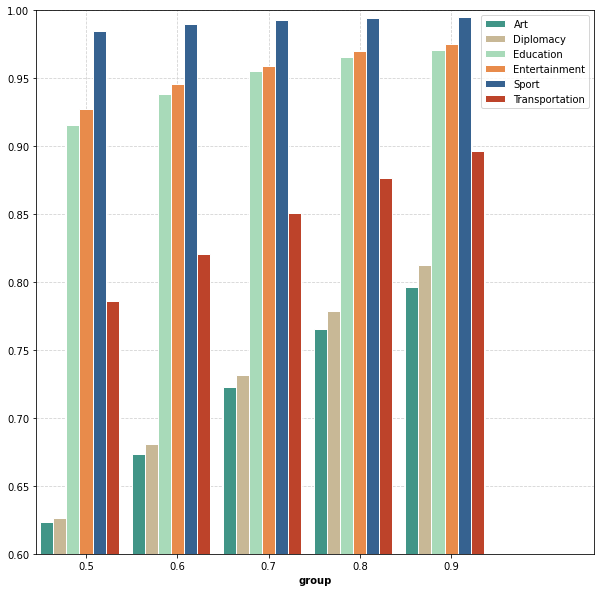

In [451]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor="w")

# set width of bars
barWidth = 0.25

# Make the plot
colors = ['#7f6d5f', '#557f2d', '#2d7f5e', '#814437', '#469CBA', '#46BA8C']
colors = ["#419587", "#C8B896", "#A8DAB9", "#E88B4B", "#366290", "#BD432A"]

r1 = np.arange(0, len(topic_values[0])+3.5, 1.75)

for idx, topic in enumerate(topic_values):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=topics[idx], zorder=3)
    r1= [x + barWidth for x in r1]
    
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([0.75, 2.5, 4.25, 6.0, 7.75], ['0.5', '0.6', '0.7', '0.8', '0.9'])
plt.ylim(0.6, 1)
plt.xlim(-.2, 10.5)

# Create legend & Show graphic
plt.legend(loc='upper right')
plt.grid(zorder=0, color='lightgray', linestyle='--')
plt.show()


In [452]:
topic_values
new_topic_values = [[] for x in topic_values[0]]
for index, topic in enumerate(topic_values):
    for i, value in enumerate(topic):
        new_topic_values[i].append(value)
new_topic_values

[[0.6232120224515661,
  0.626308848213572,
  0.9153968114154849,
  0.9273030368920779,
  0.9844969306003538,
  0.7858921161825726],
 [0.6738017071569271,
  0.6806741828948867,
  0.9386185283986429,
  0.9456775817633308,
  0.9896041583366654,
  0.8206011006067447],
 [0.7224614616488797,
  0.7319114114510467,
  0.955270566155771,
  0.9587912707905486,
  0.9927786621112707,
  0.8508277016554033],
 [0.7652645339895416,
  0.778670700576723,
  0.9657672326897728,
  0.969725235189084,
  0.9942562716445645,
  0.8763601081156005],
 [0.7962574850299401,
  0.812526913290272,
  0.9708569158971304,
  0.9748662395138384,
  0.9950865927223195,
  0.896755994358251]]

In [312]:
 np.arange(0, len(topic_values[0])+3, 1.50)

array([0. , 1.5, 3. , 4.5, 6. , 7.5])

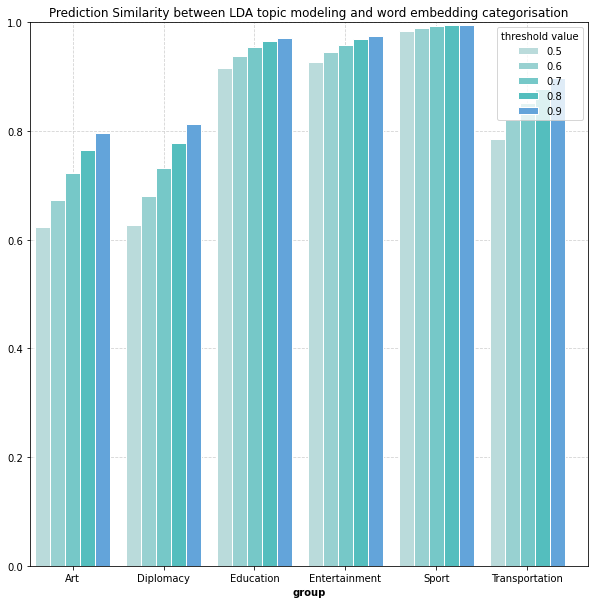

In [480]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor="w")
# set width of bars
barWidth = 0.25

r1 =  np.arange(0, len(topic_values[0])+3, 1.50)
colors =["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#97d2fb", "#eccbd9", "#eccbd9"]
colors = [ "#badbdb","#98d1d1", "#76c8c8","#54bebe", "#63a4da", "#296ead", "#2a4693"]

for idx, topic in enumerate(new_topic_values):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=thresholds[idx], zorder=3)
    r1= [x + barWidth for x in r1]

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([0.5, 2, 3.5,  5, 6.5, 8], ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation'])
plt.ylim(0, 1)
plt.xlim(-0.2, 9)

# Create legend & Show graphic
plt.title('Prediction Similarity between LDA topic modeling and word embedding categorisation')
plt.legend(title="threshold value", loc="upper right")
plt.grid(zorder=0, color='lightgray', linestyle='--')
plt.show()

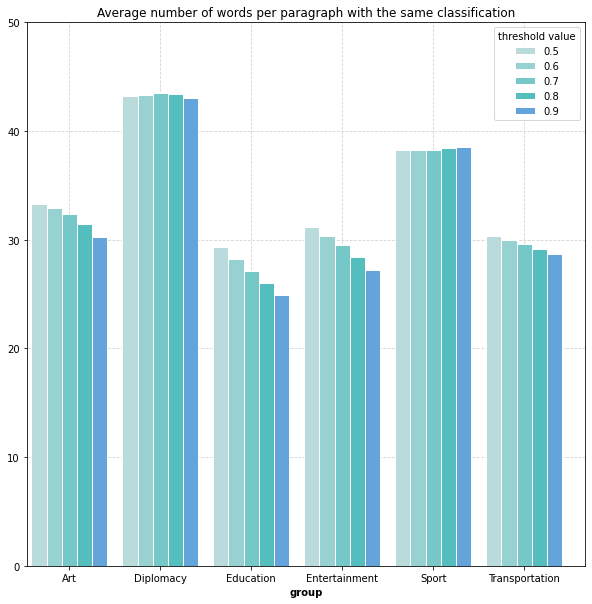

In [520]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor="w")
# set width of bars
barWidth = 0.25

r1 =  np.arange(0, len(topic_values[0])+3, 1.50)
colors =["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#97d2fb", "#eccbd9", "#eccbd9"]
colors = [ "#badbdb","#98d1d1", "#76c8c8","#54bebe", "#63a4da", "#296ead", "#2a4693"]

for idx, topic in enumerate(new_merged_pos_len):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=thresholds[idx], zorder=3)
    r1= [x + barWidth for x in r1]

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([0.5, 2, 3.5,  5, 6.5, 8], ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation'])
plt.ylim(0, 50)
plt.xlim(-0.2, 9)

# Create legend & Show graphic
plt.title('Average number of words per paragraph with the same classification')
plt.legend(title="threshold value")
plt.grid(zorder=0, color='lightgray', linestyle='--')
plt.show()

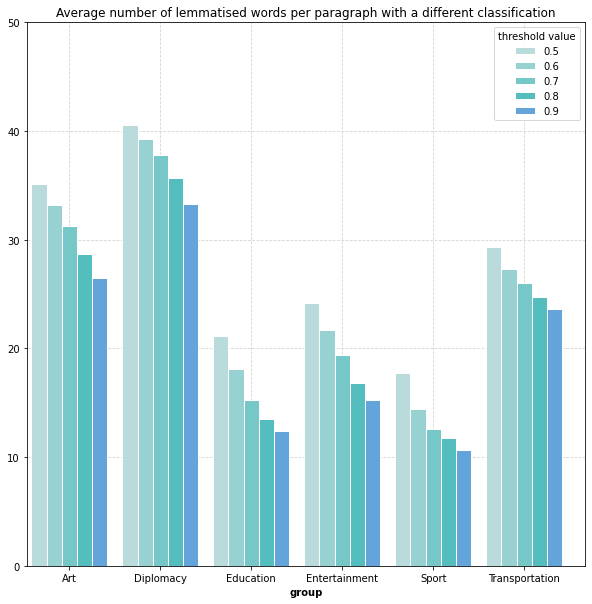

In [521]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor="w")
# set width of bars
barWidth = 0.25

r1 =  np.arange(0, len(topic_values[0])+3, 1.50)
colors =["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#97d2fb", "#eccbd9", "#eccbd9"]
colors = [ "#badbdb","#98d1d1", "#76c8c8","#54bebe", "#63a4da", "#296ead", "#2a4693"]

for idx, topic in enumerate(new_merged_pos_len2):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=thresholds[idx], zorder=3)
    r1= [x + barWidth for x in r1]

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([0.5, 2, 3.5,  5, 6.5, 8], ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation'])
plt.ylim(0, 50)
plt.xlim(-0.2, 9)

# Create legend & Show graphic
plt.title('Average number of lemmatised words per paragraph with a different classification')
plt.legend(title="threshold value")
plt.grid(zorder=0, color='lightgray', linestyle='--')
plt.show()

In [265]:
df3[df3['outcome'].notna()]

KeyError: 'outcome'

In [ ]:
categorize_text(words=lemmatised_words, number_of_keywords=1, bottom_threshold=0.1, verbose1=False, verbose2=False)

In [ ]:
# categorize_group_of_texts 

# def categorize_group_of_texts(lemmatized_wordlists, keywords, embeddings_dict, number_of_keywords=1, bottom_threshold=0.1, verbose1=False, verbose2=False):
#     categories = {}
#     for index, lemmatized_wordlist in tqdm(enumerate(lemmatized_wordlists), total=len(lemmatized_wordlists)):
#         prediction_dict = categorize_text(lemmatized_wordlist=lemmatized_wordlist, keywords=keywords, embeddings_dict=embeddings_dict, number_of_keywords=number_of_keywords, bottom_threshold=bottom_threshold, verbose1=verbose1, verbose2=verbose2)
#         try:
#             categories[prediction_dict['prediction']] +=1
#         except:
#             categories[prediction_dict['prediction']] = 1
    
#     return categories

In [176]:
df[(df['max'] < 0.4)].iloc[6].paragraph

'cycling in cardiff is facilitated by its easy gradients and large parks. in 2005, 4.3% of people commuted to work by cycling, compared to 2% in london and 5% in berlin. however, cyclists in the city appear to be influenced by deterrents to cycling and as a result will need a greater level of improved facilities to increase cycling numbers, according to research by cardiff university.'

In [183]:
df[(df['max'] > 0.9) & (df['idxmax'] == 'Sport')].iloc[87].paragraph

"in 2013, carter participated at the madrid invitational, breaking the meeting record at 9.87, also being his season best. at the moscow world championships, carter won the bronze medal in the 100m in 9.95, behind american justin gatlin (9.85) and jamaican teammate usain bolt (9.77). he won a third world championship relay gold, leading off the jamaican relay team, made up of carter, kemar bailey-cole, nickel ashmeade and bolt. the team won in 37.36 seconds. this win was jamaica's fifth consecutive major championship sprint relay gold, winning the olympics in beijing 2008 and london 2012, and the world titles in berlin 2009, daegu 2011 and moscow 2013."

# Classifying City Pairs

In [509]:
# Paragraphs per City Pair
df['city_pair'].value_counts().value_counts(bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]).sort_index()

(-0.001, 50.0]     61
(50.0, 100.0]      66
(100.0, 150.0]     45
(150.0, 200.0]     36
(200.0, 250.0]     28
(250.0, 300.0]     18
(300.0, 350.0]     19
(350.0, 400.0]     11
(400.0, 450.0]     14
(450.0, 500.0]      8
(500.0, 1000.0]    44
Name: city_pair, dtype: int64

In [ ]:
# INPUT_DIR = "../../../../../data/clean/city_pair_paragraphs3/"
# BATCHES = [5]
# POS = ["NOUN", "VERB", "ADJ"]
# ONLY_ENGLISH_WORDS = True
# sort_by_paragraphs_count = True
# merged_POS = True

# data_list = import_lemmatised_paragraphs(INPUT_DIR, POS, BATCHES, ONLY_ENGLISH_WORDS=ONLY_ENGLISH_WORDS, merged_POS=merged_POS, sort_by_paragraphs=sort_by_paragraphs_count)

# frames = [citypair['lemmatized_paragraphs'] for citypair in data_list]
# citypairs = [citypair['city_pair'] for citypair in data_list]

# result = pd.concat(frames) #, keys=citypairs)
# result.set_index('paragraph_id', inplace=True)
# result.sort_index(inplace=True)
# result.reset_index(inplace=True)
# result

In [612]:
#  & len(df['merged_POS'].str) > 20
temp2 = df[(df['max'] > 0.9) & (df['merged_POS'].str.len() > 10)].groupby(['city_pair', 'idxmax'])['same_categorisation'] #.value_counts(normalize=True)

In [637]:
temp3 = df[(df['max'] > 0.9) & (df['merged_POS'].str.len() > 10)].groupby(['city_pair'])['idxmax','same_categorisation']

In [608]:
df[(df['max'] > 0.9) & (df['idxmax'] == 'Sport') & (df['merged_POS'].str.len() > 10)]['same_categorisation'].value_counts()

True     20455
False      101
Name: same_categorisation, dtype: int64

In [611]:
df[(df['max'] > 0.9) & (df['city_pair'] == 'paris_london') & (df['idxmax'] == 'Sport') & (df['merged_POS'].str.len() > 10)]['same_categorisation'].value_counts()

True     261
False      1
Name: same_categorisation, dtype: int64

In [868]:
sample_df = df[(df['city_pair'].isin(df['city_pair'].unique()[:])) & (df['max'] > 0.7) & (df['merged_POS'].str.len() > 5)]
#sample_df['city_pair'].unique()

In [869]:
sample_df

,paragraph_id,city_pair,paragraph,merged_POS,Sport,Art,Diplomacy,Entertainment,Transportation,Education,idxmax,max,art,diplomacy,education,entertainment,sport,transportation,outcome,same_categorisation
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide...",0.000765,0.001501,0.770121,0.001536,0.001327,0.224750,Diplomacy,0.770121,0.169194,1.928616,2.025882,0.309913,0.591317,1.040785,education,False
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",0.000873,0.001713,0.002005,0.001754,0.991741,0.001914,Transportation,0.991741,0.000000,0.510214,0.640919,0.000000,0.477014,4.445736,transportation,True
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",0.002721,0.005337,0.094386,0.005463,0.886130,0.005962,Transportation,0.886130,0.000000,0.000000,0.371927,0.119219,0.000000,0.950457,transportation,True
5,6,berlin_milan,the eu contains about 40 urban areas with popu...,"[area, population, population, area, megacity,...",0.002721,0.005337,0.094386,0.005463,0.886130,0.005962,Transportation,0.886130,0.000000,0.000000,0.449584,0.000000,0.000000,0.915384,transportation,True
7,8,berlin_milan,"in the spring of 1875, lister along with agnes...","[spring, lister, sister, law, niece, group, we...",0.000601,0.040131,0.858321,0.040159,0.001043,0.059745,Diplomacy,0.858321,0.000000,0.190400,2.591743,1.868725,1.087525,1.019374,education,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310822,312681,warsaw_valencia,"as a concert singer, mikolaj had a broad reper...","[concert, singer, repertoire, work, symphony, ...",0.000985,0.193347,0.002260,0.799541,0.001708,0.002158,Entertainment,0.799541,0.578576,0.109004,2.216915,4.158394,0.000000,0.205921,entertainment,True
310823,312682,warsaw_valencia,"since 2010, edelmann has intensified his conce...","[concert, activity, guest, performance, recita...",0.001889,0.003704,0.004335,0.982658,0.003276,0.004139,Entertainment,0.982658,0.000000,0.099530,0.164835,3.578136,0.000000,0.000000,entertainment,True
310824,312683,warsaw_valencia,"born maria mokrzycka in lviv (now ukraine), sh...","[conservatory, debut, opera, opera, time, bari...",0.000729,0.001430,0.001673,0.993306,0.001264,0.001597,Entertainment,0.993306,0.064806,0.000000,2.403735,6.039672,0.170935,0.479676,entertainment,True
310825,312684,warsaw_valencia,ayala was elected a fellow of the american aca...,"[fellow, art, science, member, society, member...",0.001683,0.003300,0.003862,0.003379,0.002918,0.984857,Education,0.984857,1.120648,0.476482,4.250563,0.000000,0.000000,0.109702,education,True


In [870]:
new_df = sample_df.groupby('city_pair')

In [871]:
nested_list = [['city_pair', 'paragraphs', 'lemmatised_paragraph_length', 'same_categorisation_raw', 'same_categorisation_percentage',
                'lda_dominant_category', 'embedding_dominant_category', 'lda_art', 'embedding_art', 'lda_diplomacy',
                'embedding_diplomacy','lda_education', 'embedding_education', 'lda_entertainment', 'embedding_entertainment', 
                'lda_sport', 'embedding_sport', 'lda_transportation', 'embedding_transportation']]
# df2 = pd.DataFrame(l[1:],columns=l[0]).set_index('index')

In [872]:
from IPython.display import display

categories = ['art', 'diplomacy', 'education', 'entertainment', 'sport', 'transportation']
for x, y in tqdm(new_df):
    
    paragraph_count = y['paragraph'].count()
    same_categorisation_raw = y['same_categorisation'].sum()
    same_categorisation_percentage = y['same_categorisation'].sum()/y['same_categorisation'].count()
    lemmatised_paragraph_len = y['merged_POS'].str.len().mean()
    
    lda_prediction = y['idxmax'].value_counts()
    embedding_prediction = y['outcome'].value_counts()
        
    lda_dominant_category = lda_prediction.idxmax()
    embedding_dominant_category = embedding_prediction.idxmax()
    
    lda_prediction = lda_prediction.to_dict()
    embedding_prediction = embedding_prediction.to_dict()
   
    
    if (len(lda_prediction) != 6) or (len(embedding_prediction) != 6):
        for category in categories:
            if category.capitalize() not in lda_prediction.keys():
                lda_prediction[category.capitalize()] = 0
            if category not in embedding_prediction.keys():
                embedding_prediction[category] = 0
                
#     # print(y['idxmax'].value_counts().idxmax(), y['idxmax'].value_counts().max())
#     # print(y['idxmax'].value_counts())
   
    
#     #print(z)
    templist = [x, paragraph_count, lemmatised_paragraph_len, same_categorisation_raw, same_categorisation_percentage,
                lda_dominant_category, embedding_dominant_category, lda_prediction['Art'], embedding_prediction['art'], lda_prediction['Diplomacy'],
                embedding_prediction['diplomacy'], lda_prediction['Education'], embedding_prediction['education'],
                lda_prediction['Entertainment'], embedding_prediction['entertainment'], lda_prediction['Sport'],
                embedding_prediction['sport'], lda_prediction['Transportation'], embedding_prediction['transportation']]
    nested_list.append(templist)
    #print(len(templist))
    #print(len(nested_list[0]))
    # display(y) #.apply(display) #['Sport'].value_counts()

CPU times: total: 0 ns
Wall time: 0 ns


  0%|          | 0/434 [00:00<?, ?it/s]

In [810]:
# nested_list

In [873]:
final_df = pd.DataFrame(nested_list[1:],columns=nested_list[0]) # .set_index('city_pair')

In [875]:
(434-91)/434

0.7903225806451613

In [874]:
len(final_df[final_df['lda_dominant_category'].str.lower() != final_df['embedding_dominant_category']])

91

In [864]:
len(final_df[final_df['lda_dominant_category'].str.lower() != final_df['embedding_dominant_category']])

57

In [851]:
final_df[final_df['lda_dominant_category'].str.lower() != final_df['embedding_dominant_category']]

,city_pair,paragraphs,lemmatised_paragraph_length,same_categorisation_raw,same_categorisation_percentage,lda_dominant_category,embedding_dominant_category,lda_art,embedding_art,lda_diplomacy,embedding_diplomacy,lda_education,embedding_education,lda_entertainment,embedding_entertainment,lda_sport,embedding_sport,lda_transportation,embedding_transportation
0,athens_birmingham,115,31.295652,103,0.895652,Sport,education,12,10,6,7,28,36,19,19,29,27,21,16
1,athens_brussels,226,30.623894,173,0.765487,Diplomacy,education,37,24,61,53,29,57,38,39,14,17,47,36
2,athens_bucharest,150,34.213333,122,0.813333,Diplomacy,education,14,7,52,44,34,48,12,11,8,12,30,28
5,athens_copenhagen,154,33.233766,122,0.792208,Transportation,education,24,19,29,20,21,36,21,19,24,28,35,32
15,athens_prague,207,32.028986,165,0.797101,Transportation,sport,25,14,35,23,28,48,31,28,41,50,47,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,vienna_copenhagen,512,32.900391,402,0.785156,Entertainment,education,91,59,97,65,117,170,134,140,15,29,58,49
416,vienna_munich,2715,31.596317,2183,0.804052,Entertainment,education,497,392,402,262,728,929,777,780,69,129,242,223
423,warsaw_copenhagen,144,27.527778,118,0.819444,Diplomacy,education,20,11,33,27,21,32,28,27,10,17,32,30
425,warsaw_glasgow,45,31.644444,37,0.822222,Art,education,12,9,7,4,7,15,8,8,6,5,5,4


In [910]:
final_df[final_df['city_pair'] == 'paris_london']

,city_pair,paragraphs,lemmatised_paragraph_length,same_categorisation_raw,same_categorisation_percentage,lda_dominant_category,embedding_dominant_category,lda_art,embedding_art,lda_diplomacy,embedding_diplomacy,lda_education,embedding_education,lda_entertainment,embedding_entertainment,lda_sport,embedding_sport,lda_transportation,embedding_transportation
345,paris_london,13632,33.708773,10905,0.799956,Art,education,3655,2646,2763,2062,2411,3994,2712,2753,402,728,1689,1449


In [911]:
final_df.paragraphs.value_counts(bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 4000, 6000, 8000, 30000]).sort_index()

(-0.001, 50.0]       85
(50.0, 100.0]        66
(100.0, 150.0]       57
(150.0, 200.0]       29
(200.0, 250.0]       28
(250.0, 300.0]       20
(300.0, 350.0]       16
(350.0, 400.0]       10
(400.0, 450.0]        3
(450.0, 500.0]        7
(500.0, 1000.0]      54
(1000.0, 2000.0]     36
(2000.0, 4000.0]     15
(4000.0, 6000.0]      6
(6000.0, 8000.0]      1
(8000.0, 30000.0]     1
Name: paragraphs, dtype: int64

In [876]:
final_df['lda_dominant_category'].value_counts()

Entertainment     155
Sport             101
Transportation     73
Diplomacy          67
Education          20
Art                18
Name: lda_dominant_category, dtype: int64

In [877]:
final_df['embedding_dominant_category'].value_counts()

entertainment     144
sport             106
education          87
transportation     59
diplomacy          33
art                 5
Name: embedding_dominant_category, dtype: int64

In [847]:
final_df['lda_dominant_category'].value_counts()

Entertainment     150
Sport              92
Diplomacy          72
Transportation     65
Education          32
Art                23
Name: lda_dominant_category, dtype: int64

In [848]:
final_df['embedding_dominant_category'].value_counts()

education         137
entertainment     137
sport              97
transportation     42
diplomacy          19
art                 2
Name: embedding_dominant_category, dtype: int64

In [898]:
final_df[final_df['city_pair'].str.contains('paris')] # ['lda_dominant_category'].value_counts() # ['same_categorisation_percentage']

,city_pair,paragraphs,lemmatised_paragraph_length,same_categorisation_raw,same_categorisation_percentage,lda_dominant_category,embedding_dominant_category,lda_art,embedding_art,lda_diplomacy,embedding_diplomacy,lda_education,embedding_education,lda_entertainment,embedding_entertainment,lda_sport,embedding_sport,lda_transportation,embedding_transportation
331,paris_athens,857,31.960327,752,0.877480,Education,education,166,130,159,125,229,291,108,107,111,120,84,84
332,paris_barcelona,1715,32.163265,1483,0.864723,Art,education,408,317,206,164,208,349,355,344,308,331,230,210
333,paris_berlin,5254,33.849067,4479,0.852493,Education,education,1114,843,1058,846,1316,1744,1229,1245,170,255,367,321
334,paris_birmingham,356,33.219101,310,0.870787,Entertainment,education,73,54,19,11,68,101,82,82,53,54,61,54
335,paris_brussels,3108,31.340734,2606,0.838481,Diplomacy,education,615,491,770,626,377,671,610,604,178,222,558,494
336,paris_bucharest,640,36.320312,564,0.881250,Education,education,79,55,160,131,246,292,76,80,26,36,53,46
337,paris_budapest,796,31.631910,681,0.855528,Education,education,172,136,113,100,181,230,156,150,69,82,105,98
338,paris_cologne,817,34.536108,687,0.840881,Entertainment,entertainment,219,168,103,72,143,213,223,220,20,31,109,113
339,paris_copenhagen,1033,31.233301,857,0.829622,Art,education,276,209,179,126,266,379,161,159,36,53,115,107
340,paris_frankfurt,1185,32.913924,983,0.829536,Transportation,transportation,181,129,150,125,166,299,211,223,57,68,420,341


In [884]:
final_df[(final_df['lda_dominant_category'] == 'Transportation') | (final_df['embedding_dominant_category'] == 'transportation')] # .head(50)

,city_pair,paragraphs,lemmatised_paragraph_length,same_categorisation_raw,same_categorisation_percentage,lda_dominant_category,embedding_dominant_category,lda_art,embedding_art,lda_diplomacy,embedding_diplomacy,lda_education,embedding_education,lda_entertainment,embedding_entertainment,lda_sport,embedding_sport,lda_transportation,embedding_transportation
5,athens_copenhagen,122,33.221311,109,0.893443,Transportation,transportation,16,12,20,17,14,22,16,17,24,24,32,30
6,athens_frankfurt,113,34.265487,108,0.955752,Transportation,transportation,10,9,14,12,13,14,25,25,13,14,38,39
9,athens_katowice,6,30.166667,6,1.000000,Transportation,transportation,0,0,0,0,0,0,1,1,2,2,3,3
10,athens_lisbon,100,35.240000,84,0.840000,Transportation,transportation,14,8,17,19,8,17,16,15,16,18,29,23
15,athens_prague,159,33.817610,137,0.861635,Transportation,sport,18,12,25,17,15,29,25,24,37,41,39,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,stuttgart_frankfurt,690,32.992754,630,0.913043,Transportation,transportation,33,20,94,83,57,97,157,152,142,150,207,188
397,stuttgart_munich,1042,32.049904,926,0.888676,Transportation,sport,68,46,96,77,187,240,201,196,243,257,247,226
404,turin_lyon,131,30.061069,111,0.847328,Transportation,transportation,14,10,32,26,10,20,9,10,8,11,58,54
423,warsaw_copenhagen,107,27.214953,93,0.869159,Transportation,transportation,15,9,24,21,12,19,21,22,9,12,26,24


In [901]:
final_df.to_csv('../../../../../data/clean/classified_435_citypairs_final_above_0_7_mergedPOS_len_5+.csv', index=False)

In [902]:
# aggregation_functions = {'paragraph': 'count', 'same_categorisation': 'sum', 'idxmax': 'value_counts'}
# test = sample_df.groupby(sample_df['city_pair']).aggregate(aggregation_functions)
# test

In [651]:
temp3.get_group('madrid_manchester')['idxmax'].value_counts()

Sport             465
Transportation     14
Entertainment      12
Education           6
Art                 2
Diplomacy           1
Name: idxmax, dtype: int64

In [646]:
temp3.get_group('paris_london').groupby('idxmax').value_counts(normalize=True) #.value_counts().head(20)

idxmax          same_categorisation
Art             True                   0.779830
                False                  0.220170
Diplomacy       True                   0.801325
                False                  0.198675
Education       True                   0.963608
                False                  0.036392
Entertainment   True                   0.968526
                False                  0.031474
Sport           True                   0.996183
                False                  0.003817
Transportation  True                   0.816327
                False                  0.183673
dtype: float64

In [633]:
t = 'Transportation'
print(temp2.get_group(('paris_london', t)).value_counts(normalize=True))
temp2.value_counts(normalize=True) #.get_group(('paris_london', t)).value_counts()

True     0.816327
False    0.183673
Name: same_categorisation, dtype: float64


city_pair          idxmax          same_categorisation
athens_birmingham  Art             True                   1.000000
                   Diplomacy       True                   1.000000
                   Education       True                   1.000000
                   Entertainment   True                   1.000000
                   Sport           True                   1.000000
                                                            ...   
warsaw_vienna      Entertainment   True                   0.988506
                                   False                  0.011494
                   Sport           True                   1.000000
                   Transportation  True                   0.939759
                                   False                  0.060241
Name: same_categorisation, Length: 3851, dtype: float64

In [584]:
len(data)

4

In [588]:
# temp2.value_counts()
data = {'total_paragraphs': temp2.count(), 'same_classification_raw': temp2.sum(), 'same_classification_percentage': temp2.sum()/temp2.count()}
city_pair_df = pd.DataFrame(data) # columns=['city_pair', 'total_paragraphs', 'same_classification_raw', 'same_classification_percentage']
city_pair_df

,total_paragraphs,same_classification_raw,same_classification_percentage
city_pair,,,
athens_birmingham,57,57,1.000000
athens_brussels,111,100,0.900901
athens_bucharest,86,79,0.918605
athens_budapest,104,100,0.961538
athens_cologne,34,33,0.970588
...,...,...,...
warsaw_stockholm,116,109,0.939655
warsaw_stuttgart,29,25,0.862069
warsaw_turin,22,20,0.909091


In [580]:
temp2.count().index

AttributeError: 'SeriesGroupBy' object has no attribute 'index'